# Feed forward neural network Model for forecasting

Importing all necessary modules

In [1]:
from data import result_df
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras import backend as K
from keras import optimizers
from keras.callbacks.callbacks import EarlyStopping
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_validate

Using TensorFlow backend.


Removing Average Mean, Differential to become a little more efficient

In [2]:
X = result_df[['Open', 'High', 'Low', 'Polarity', 'Sentiment']]
y = result_df[['Close']]

Time series specific train-test-split

In [4]:
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

Scaling all values for a normalized input and output

In [5]:
min_max_scaler = MinMaxScaler()

# Changed fit_transform to transform for test fold to avoid data leakage from future test set
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
y_train = min_max_scaler.fit_transform(y_train)
y_test = min_max_scaler.transform(y_test)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Function for calculating r-squared as a metric for Keras

In [6]:
def r_squared(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

Begin NN

In [8]:
model = Sequential()

model.add(Dense(units = 20, activation = 'relu'))
model.add(Dense(units = 1))

adam = optimizers.Adam(learning_rate = .003)
model.compile(optimizer = adam, loss = 'mean_absolute_error', metrics=[r_squared])

history = model.fit(X_train, y_train, epochs = 200, validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 0)

# Mean-absolute-error: 0.00567343344951354, R-squared: 0.953440248966217, after 200 epochs, lr = .003, n_splits=5
print("Mean-absolute-error: ", score[0])
print("R-squared: ", score[1])

Train on 949 samples, validate on 189 samples
Epoch 1/200
949/949 [==============================] - 0s 139us/step - loss: 0.2210 - r_squared: -0.1488 - val_loss: 0.0781 - val_r_squared: -4.4706
Epoch 2/200
949/949 [==============================] - 0s 51us/step - loss: 0.0529 - r_squared: 0.9452 - val_loss: 0.0155 - val_r_squared: 0.6760
Epoch 3/200
949/949 [==============================] - 0s 39us/step - loss: 0.0157 - r_squared: 0.9950 - val_loss: 0.0115 - val_r_squared: 0.8244
Epoch 4/200
949/949 [==============================] - 0s 50us/step - loss: 0.0115 - r_squared: 0.9969 - val_loss: 0.0116 - val_r_squared: 0.8237
Epoch 5/200
949/949 [==============================] - 0s 56us/step - loss: 0.0102 - r_squared: 0.9973 - val_loss: 0.0121 - val_r_squared: 0.8064
Epoch 6/200
949/949 [==============================] - 0s 60us/step - loss: 0.0109 - r_squared: 0.9970 - val_loss: 0.0092 - val_r_squared: 0.8808
Epoch 7/200
949/949 [==============================] - 0s 45us/step - loss:

949/949 [==============================] - 0s 43us/step - loss: 0.0082 - r_squared: 0.9983 - val_loss: 0.0083 - val_r_squared: 0.9098
Epoch 57/200
949/949 [==============================] - 0s 37us/step - loss: 0.0076 - r_squared: 0.9984 - val_loss: 0.0086 - val_r_squared: 0.8945
Epoch 58/200
949/949 [==============================] - 0s 38us/step - loss: 0.0085 - r_squared: 0.9981 - val_loss: 0.0123 - val_r_squared: 0.8214
Epoch 59/200
949/949 [==============================] - 0s 37us/step - loss: 0.0084 - r_squared: 0.9982 - val_loss: 0.0084 - val_r_squared: 0.8997
Epoch 60/200
949/949 [==============================] - 0s 43us/step - loss: 0.0074 - r_squared: 0.9984 - val_loss: 0.0085 - val_r_squared: 0.8982
Epoch 61/200
949/949 [==============================] - 0s 32us/step - loss: 0.0076 - r_squared: 0.9984 - val_loss: 0.0090 - val_r_squared: 0.8948
Epoch 62/200
949/949 [==============================] - 0s 37us/step - loss: 0.0075 - r_squared: 0.9985 - val_loss: 0.0081 - val_r_

Epoch 112/200
949/949 [==============================] - 0s 45us/step - loss: 0.0061 - r_squared: 0.9990 - val_loss: 0.0085 - val_r_squared: 0.9077
Epoch 113/200
949/949 [==============================] - 0s 33us/step - loss: 0.0062 - r_squared: 0.9990 - val_loss: 0.0077 - val_r_squared: 0.9160
Epoch 114/200
949/949 [==============================] - 0s 35us/step - loss: 0.0067 - r_squared: 0.9989 - val_loss: 0.0094 - val_r_squared: 0.8772
Epoch 115/200
949/949 [==============================] - 0s 36us/step - loss: 0.0083 - r_squared: 0.9984 - val_loss: 0.0092 - val_r_squared: 0.8846
Epoch 116/200
949/949 [==============================] - 0s 37us/step - loss: 0.0061 - r_squared: 0.9990 - val_loss: 0.0070 - val_r_squared: 0.9310
Epoch 117/200
949/949 [==============================] - 0s 36us/step - loss: 0.0062 - r_squared: 0.9990 - val_loss: 0.0090 - val_r_squared: 0.8996
Epoch 118/200
949/949 [==============================] - 0s 37us/step - loss: 0.0064 - r_squared: 0.9990 - val_l

949/949 [==============================] - 0s 33us/step - loss: 0.0056 - r_squared: 0.9992 - val_loss: 0.0085 - val_r_squared: 0.9130
Epoch 168/200
949/949 [==============================] - 0s 38us/step - loss: 0.0058 - r_squared: 0.9992 - val_loss: 0.0085 - val_r_squared: 0.9000
Epoch 169/200
949/949 [==============================] - 0s 34us/step - loss: 0.0057 - r_squared: 0.9991 - val_loss: 0.0068 - val_r_squared: 0.9307
Epoch 170/200
949/949 [==============================] - 0s 47us/step - loss: 0.0064 - r_squared: 0.9990 - val_loss: 0.0113 - val_r_squared: 0.8594
Epoch 171/200
949/949 [==============================] - 0s 37us/step - loss: 0.0058 - r_squared: 0.9992 - val_loss: 0.0087 - val_r_squared: 0.8919
Epoch 172/200
949/949 [==============================] - 0s 37us/step - loss: 0.0057 - r_squared: 0.9991 - val_loss: 0.0065 - val_r_squared: 0.9386
Epoch 173/200
949/949 [==============================] - 0s 35us/step - loss: 0.0054 - r_squared: 0.9992 - val_loss: 0.0081 - 

Plot of metrics and diagnostics - specifically of loss/val-loss

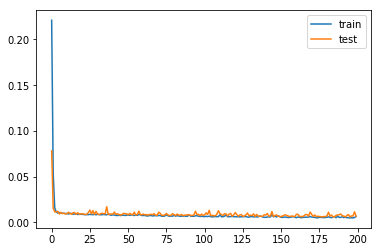

In [9]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Plot of metrics and diagnostics - specifically of r-squared/val-r-squared

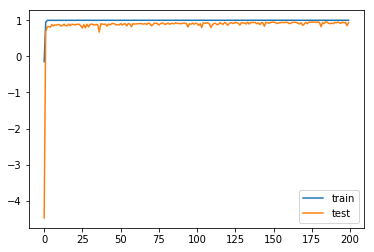

In [10]:
plt.plot(history.history['r_squared'], label='train')
plt.plot(history.history['val_r_squared'], label='test')
plt.legend()
plt.show()

Predicted Stock Prices

In [11]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = min_max_scaler.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[1627.03  ]
 [1649.6521]
 [1642.0044]
 [1599.9562]
 [1568.8234]
 [1568.8234]
 [1568.8234]
 [1590.8726]
 [1626.0337]
 [1647.4155]
 [1620.0594]
 [1611.2174]
 [1611.2174]
 [1611.2174]
 [1611.2174]
 [1613.1171]
 [1618.901 ]
 [1607.9425]
 [1631.4559]
 [1631.4559]
 [1631.4559]
 [1643.0437]
 [1629.0869]
 [1628.3297]
 [1638.475 ]
 [1666.7744]
 [1666.7744]
 [1666.7744]
 [1695.2998]
 [1691.5787]
 [1676.5536]
 [1631.5228]
 [1596.4531]
 [1596.4531]
 [1596.4531]
 [1645.5404]
 [1675.5088]
 [1693.1364]
 [1687.7542]
 [1708.367 ]
 [1708.367 ]
 [1708.367 ]
 [1726.5879]
 [1763.7858]
 [1777.1741]
 [1810.8907]
 [1779.5542]
 [1779.5542]
 [1779.5542]
 [1769.0327]
 [1788.2201]
 [1756.6165]
 [1758.5309]
 [1785.9396]
 [1785.9396]
 [1785.9396]
 [1812.3402]
 [1814.9696]
 [1817.558 ]
 [1809.1854]
 [1835.8456]
 [1835.8456]
 [1835.8456]
 [1835.8456]
 [1842.6792]
 [1839.4032]
 [1846.285 ]
 [1848.4994]
 [1848.4994]
 [1848.4994]
 [1822.5615]
 [1853.2289]
 [1860.468 ]
 [1857.4562]
 [1857.4562]
 [1857.4562]
 [1857.4562]